In [50]:
from data import load_dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [51]:
train_path = r"dataset\train_catvsnoncat.h5"
test_path = r"dataset\test_catvsnoncat.h5"
train_x_orig, test_x_orig, train_y_orig, test_y_orig, classes = load_dataset(train_path=train_path, test_path=test_path)

In [52]:
train_x_orig

array([[[[ 17,  31,  56],
         [ 22,  33,  59],
         [ 25,  35,  62],
         ...,
         [  1,  28,  57],
         [  1,  26,  56],
         [  1,  22,  51]],

        [[ 25,  36,  62],
         [ 28,  38,  64],
         [ 30,  40,  67],
         ...,
         [  1,  27,  56],
         [  1,  25,  55],
         [  2,  21,  51]],

        [[ 32,  40,  67],
         [ 34,  42,  69],
         [ 35,  42,  70],
         ...,
         [  1,  25,  55],
         [  0,  24,  54],
         [  1,  21,  51]],

        ...,

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [53]:
train_x_orig.shape

(209, 64, 64, 3)

In [54]:
train_y_orig.shape

(1, 209)

In [55]:
classes

array([b'non-cat', b'cat'], dtype='|S7')

y[1], Đây là cat


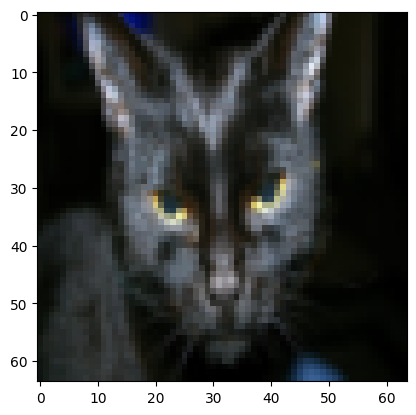

In [56]:
plt.imshow(train_x_orig[25])
print(f"y{train_y_orig[:, 25]}, Đây là {classes[np.squeeze(train_y_orig[:, 25])].decode('utf-8')}")
plt.show()

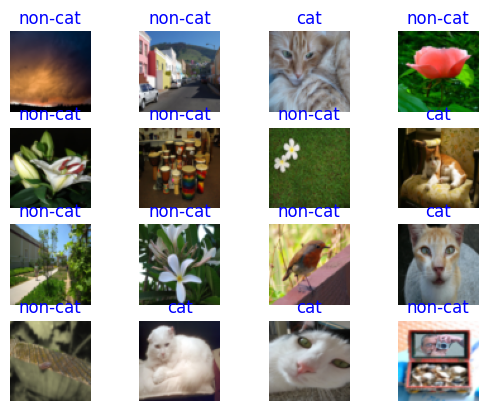

In [57]:
def show_16pic_first():
    for i in range(16):
        plt.subplot(4, 4, i + 1)
        image = train_x_orig[i]     
        plt.imshow(image)
        class_name = classes[np.squeeze(train_y_orig[:, i])].decode('utf-8')
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()
show_16pic_first()

In [58]:
def preprocessing(train_x_orig, test_x_orig):
    train_x_flatten = train_x_orig.reshape((train_x_orig.shape[0], -1)).T
    test_x_flatten = test_x_orig.reshape((test_x_orig.shape[0], -1)).T
    train_x = train_x_flatten / 255
    test_x = test_x_flatten / 255
    return train_x, test_x

In [59]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cal_cost(m, A, Y):
    return - (1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)
    dw = np.dot(X, (A - Y).T) / m
    db = np.sum(A - Y) / m
    cost = cal_cost(m, A, Y)
    return dw, db, cost

def optimize(w, b, X, Y, learning_rate=0.05, nums_iteration=100):
    costs = []
    for i in range(nums_iteration):
        dw, db, cost = propagate(w, b, X, Y)
        w -= learning_rate * dw
        b -= learning_rate * db
        costs.append(cost)
        print (f"Cost after iteration {(i, cost)} with w = {w} and b = {b}")
    return w, b, dw, db, costs

def predict(w, b, X):
    Y_predictions = np.zeros((1, X.shape[1]))
    A = sigmoid(np.dot(w.T, X) + b) #(1, m)
    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            Y_predictions[0, i] = 1
        else:
            Y_predictions[0, i] = 0
    return Y_predictions
    
def initallize_zeros(dim):
    w = np.zeros((dim, 1))
    b = float(0)
    return w, b
    
def model(train_x, train_y, test_x, test_y, nums_iteration=2000, learning_rate=0.05):
    w, b = initallize_zeros(train_x.shape[0])
    w, b, dw, db, costs = optimize(w, b, train_x, train_y, learning_rate, nums_iteration)
    Y_test_prediction = predict(w, b, test_x)
    Y_train_prediction = predict(w, b, train_x)
    d = {"w": w,
        "b": b,
        "dw": dw,
        "db": db,
        "costs": costs,
        "Y_test_prediction": Y_test_prediction,
        "Y_train_prediction": Y_train_prediction,
        "nt": nums_iteration,
        "lr": learning_rate}
    return d

In [60]:
train_x, test_x = preprocessing(train_x_orig, test_x_orig)
train_x.shape

(12288, 209)

In [61]:
logistic_regression_model = model(train_x, train_y_orig, test_x, test_y_orig, nums_iteration=2000, learning_rate=0.005)

Cost after iteration (0, 0.6931471805599453) with w = [[-0.00023604]
 [-0.00031499]
 [-0.00024618]
 ...
 [-0.00025373]
 [-0.00031063]
 [-0.00016226]] and b = -0.000777511961722488
Cost after iteration (1, 0.7410294145065183) with w = [[ 1.67809731e-04]
 [ 2.72583226e-05]
 [ 9.40892297e-05]
 ...
 [ 5.01647098e-05]
 [-5.09232379e-05]
 [ 1.41240086e-04]] and b = -8.728482766931305e-06
Cost after iteration (2, 0.7531535818862111) with w = [[-0.00025683]
 [-0.00048005]
 [-0.00032764]
 ...
 [-0.00036727]
 [-0.00052668]
 [-0.00016057]] and b = -0.0012154543696721227
Cost after iteration (3, 0.8667086956701203) with w = [[ 2.78189568e-04]
 [-3.04341051e-06]
 [ 1.29511661e-04]
 ...
 [ 5.08920540e-05]
 [-1.48311165e-04]
 [ 2.35435186e-04]] and b = -9.830865249032747e-05
Cost after iteration (4, 0.7685635006608347) with w = [[-0.00019498]
 [-0.00055877]
 [-0.00033772]
 ...
 [-0.00040869]
 [-0.00066532]
 [-0.00010288]] and b = -0.0014079541349536816
Cost after iteration (5, 0.897014473644793) with

In [62]:
logistic_regression_model["b"]

-0.015906243999692954

In [63]:
img = test_x[:, 25].reshape((64,64,3))
label_act = classes[np.squeeze(test_y_orig[:, 25])].decode("utf-8")
label_pred = classes[int(np.squeeze(logistic_regression_model["Y_test_prediction"][:, 25]))].decode("utf-8")
print(label_act)
print(label_pred)

cat
cat


In [64]:
print(np.squeeze(logistic_regression_model["Y_test_prediction"][:, 25]))

1.0


In [65]:
test_y_orig

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [66]:
logistic_regression_model["Y_test_prediction"].dtype

dtype('float64')

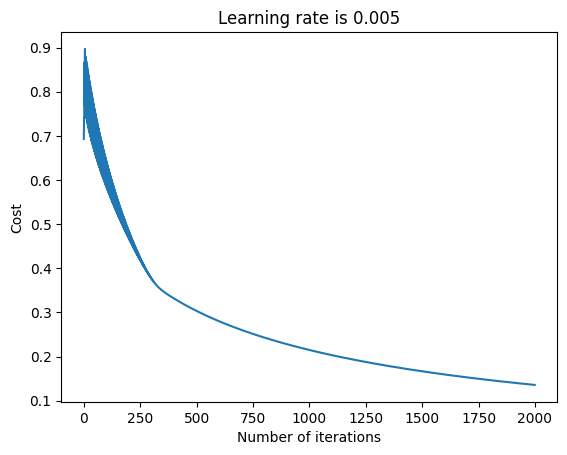

In [67]:
plt.plot(logistic_regression_model['costs'])
plt.title("Learning rate is 0.005")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

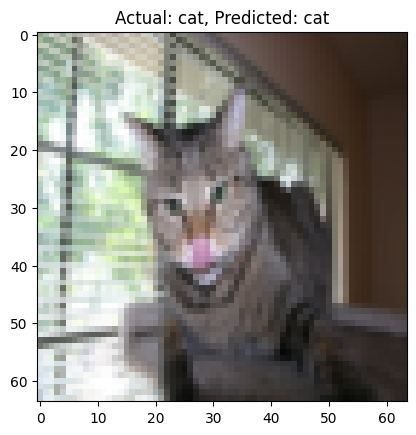

In [68]:
def show_prediction(index):
    img = test_x[:, index].reshape((64, 64, 3))
    label_act = classes[int(np.squeeze(test_y_orig[:, index]))].decode("utf-8")
    label_pred = classes[int(np.squeeze(logistic_regression_model["Y_test_prediction"][:, index]))].decode("utf-8")
    plt.imshow(img)
    plt.title(f"Actual: {label_act}, Predicted: {label_pred}")
    plt.show()
show_prediction(20)

In [69]:
def predict_other(path):
    from PIL import Image
    img = Image.open(path)
    img_resized = np.array(img.resize((64, 64)))
    img_reshaped = img_resized.reshape(-1, 1)
    img = img_reshaped / 255
    w = logistic_regression_model["w"]
    b = logistic_regression_model["b"]
    a = sigmoid(np.dot(w.T, img) + b)
    if a > 0.5:
        print(f"Với xác suất = {np.squeeze(a)} thì đây là mèo")
    else:
        print(f"Với xác suất = {np.squeeze(a)} thì đây không phải mèo")

In [70]:
predict_other("cat.jpg")

Với xác suất = 0.8218009344641184 thì đây là mèo


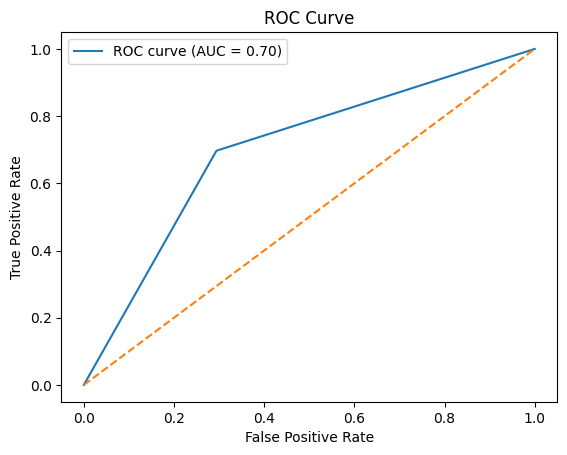

In [71]:
preds_test = logistic_regression_model["Y_test_prediction"]
fpr, tpr, thresholds = roc_curve(test_y_orig.ravel(), preds_test.ravel())
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()